# Predicción y caracterización de residuos

In [26]:
from utils import func_tools
import importlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
importlib.reload(func_tools);

### Cargar los datos e imputar elementos faltantes

In [27]:
estratificacion = pd.read_csv('estratificacion.csv',delimiter=',', index_col='ID')
estratificacion = estratificacion.fillna(0)
data_csv_zona = pd.read_csv('residuosrecogidos_zona.csv', delimiter=',')
caracterizacion = pd.read_csv('caracterizacion.csv', delimiter=',')
data_csv_localidad = pd.read_csv('residuosrecogidos_localidad.csv', delimiter=',')
data_csv_zona = func_tools.fillna_col_anterior(data_csv_zona)
data_csv_localidad = func_tools.fillna_2013(data_csv_localidad, estratificacion, data_csv_zona )

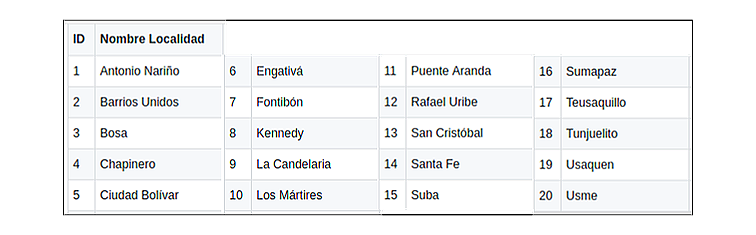

In [28]:
from IPython.display import Image
Image("ids.png")

### Definir parámetros y modelo

In [29]:
parametros = func_tools.iniciar()

Inicio ....
Modelo a entrenar para zonas o localidades? = zonas
Tamaño de la ventana para suavizar las series entre 1 - 4 
Tamaño de la ventana para el suavizado de las series? = 1
Modelos disponibles SVR y LSTM (con pasos de tiempo)
Cuál modelo quiere entrenar? = LSTM
Número de predicciones no superior a 24 meses
Número de prediciones a realizar? (en meses) = 24
Número de capas entre 1-10
Cuántas capas? = 5
Número de entrenamiento entre 1 - 300
Cuántas epocas de entrenamiento? = 200
Número de pasos anteriores entre 1 - 5
Cuántos pasos anteriores? = 3
OK... Parámetros guardados


In [30]:
parametros

['zonas', '1', 'LSTM', 5, 200, 3, '24']

### Generar series

In [31]:
dic_series, series_list = func_tools.generar_series(estratificacion, data_csv_zona, data_csv_localidad, parametros)

### Entrenamiento y predicción

Valores en train:  60


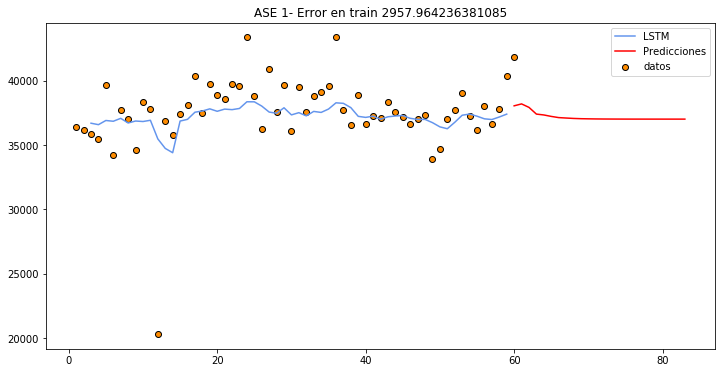

Valores en train:  60


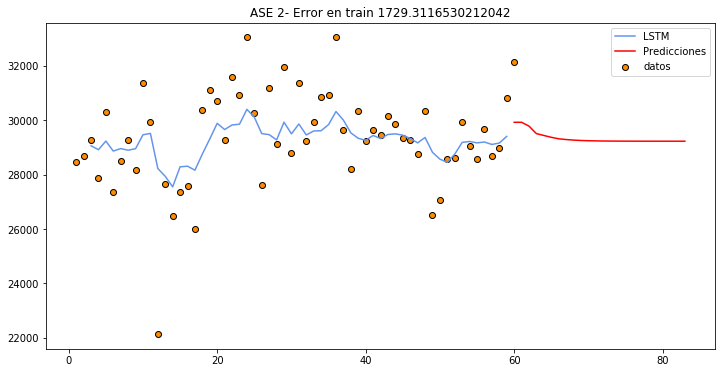

Valores en train:  60


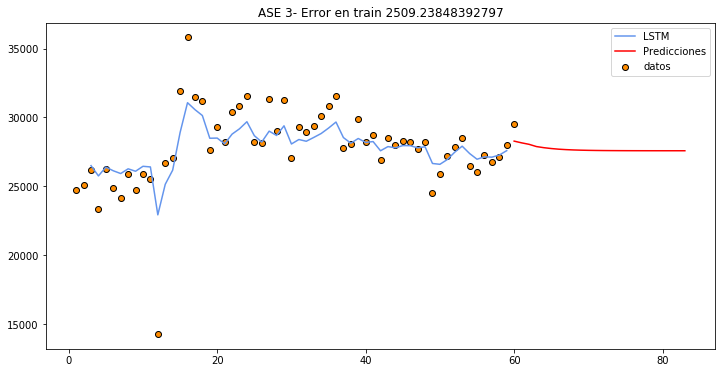

Valores en train:  60


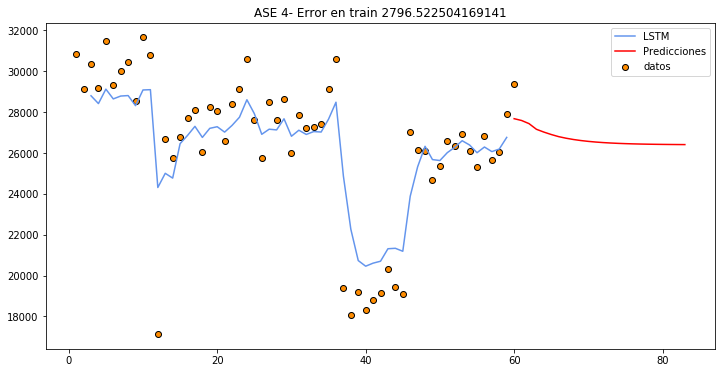

Valores en train:  60


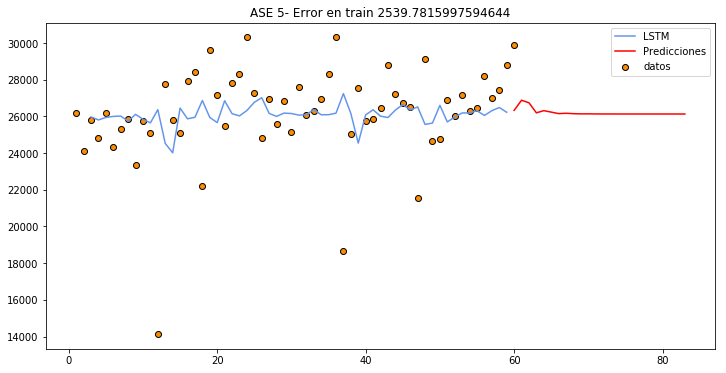

Valores en train:  60


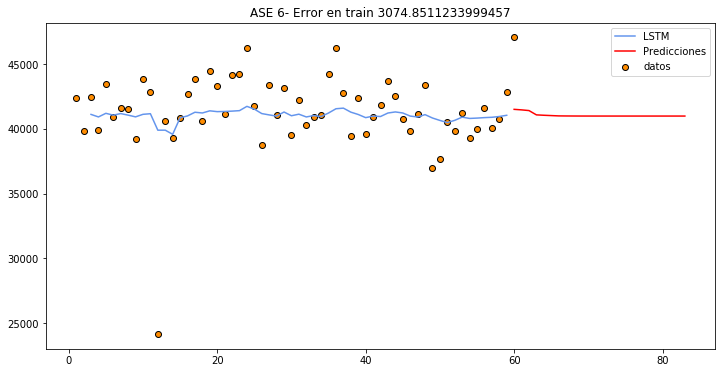

In [32]:
prediciones = func_tools.entrenar_modelo(dic_series, series_list, parametros)   

### Caracterización

In [33]:
residuos_estrato = func_tools.estratificacion_residuos(parametros[0], estratificacion, caracterizacion, prediciones, data_csv_zona, data_csv_localidad)

### Visualización por estratos

Cuál zona (ID: 1-6) quiere visualizar? = 3
Cuál predicción (mes) quiere visualizar? = 20


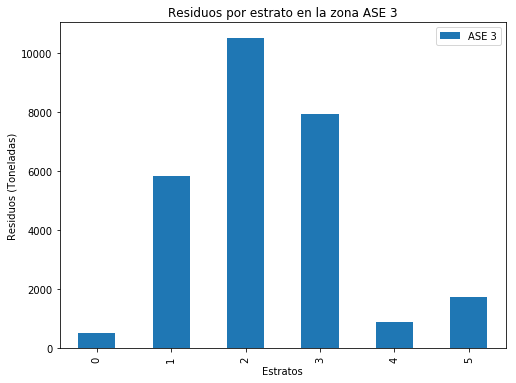

In [35]:
func_tools.plot_residuos_estrato(estratificacion,residuos_estrato, parametros)

### Visualización por tipo de residuo

Cuál zona (1-6) quiere visualizar? = 3
Cuál predicción (mes) quiere visualizar? = 20
Cuál es el estrato (1-6) que quiere visualizar? = 3


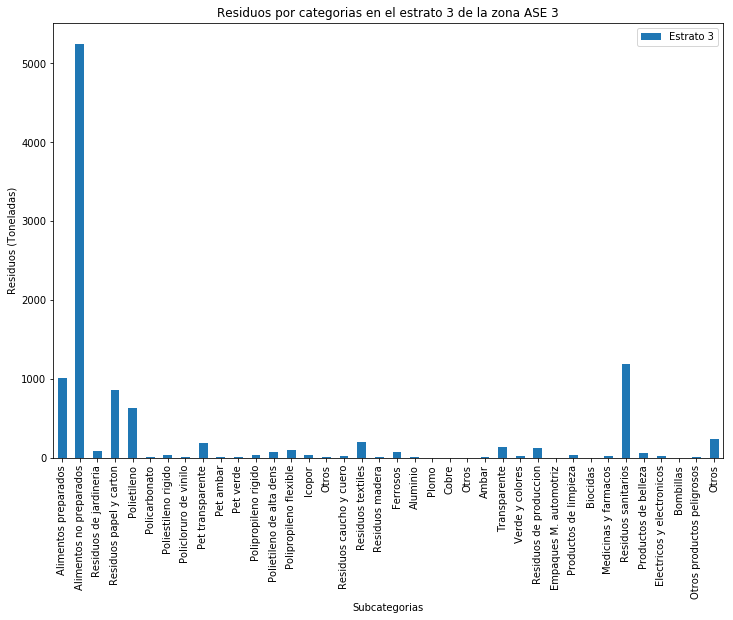

In [37]:
func_tools.plot_caracterizacion(estratificacion, caracterizacion, residuos_estrato, parametros)